Variable we want to predict: Total Claim Amount

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_columns', None)

### Data Exploration

In [3]:
#reading data
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
data.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [6]:
data.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [7]:
data.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [9]:
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'], errors='coerce')
data.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [10]:
data = data.rename(columns={'EmploymentStatus':'Employment Status'})
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'Employment Status', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [11]:
new_columns = []
for i in data.columns:
    i =  i.replace(' ','_').lower()
    new_columns.append(i)
data.columns = new_columns
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [12]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


###  Separate data into numericals, categoricals and ordinals

##### categoricals

In [13]:
data_cat = data.select_dtypes(include= np.object).iloc[:,[1,2,5,6,7,8,9,10,11,12,13]]
data_cat.head()

,state,response,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,No,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
1,Arizona,No,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car
2,Nevada,No,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car
3,California,No,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV
4,Washington,No,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car


##### ordinals

In [14]:
data_ord = data[['coverage','education','vehicle_size']]
data_ord.head()

,coverage,education,vehicle_size
0,Basic,Bachelor,Medsize
1,Extended,Bachelor,Medsize
2,Premium,Bachelor,Medsize
3,Basic,Bachelor,Medsize
4,Basic,Bachelor,Medsize


##### numericals

In [15]:
data_num = data.select_dtypes(include = np.number)
data_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [16]:
data_num.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


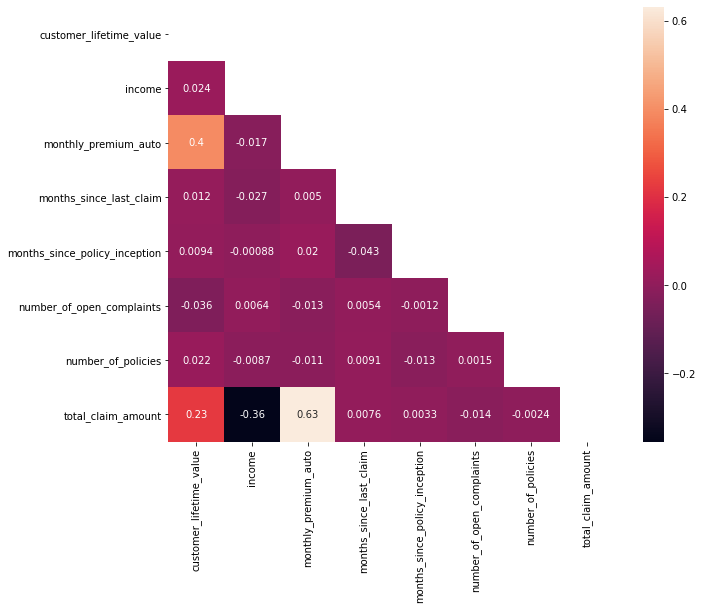

In [17]:
mask = np.zeros_like(data_num.corr()) # constracts zero matrix
mask[np.triu_indices_from(mask)] = True # don't include if you think it will confuse the students right now
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data_num.corr(), mask=mask, annot=True)
plt.show() # Half correlation matrix

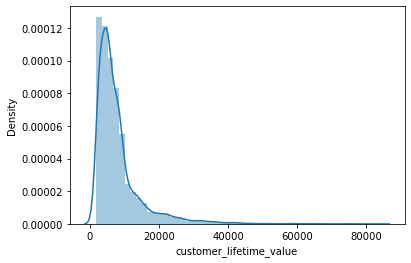

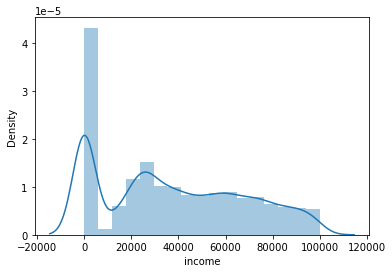

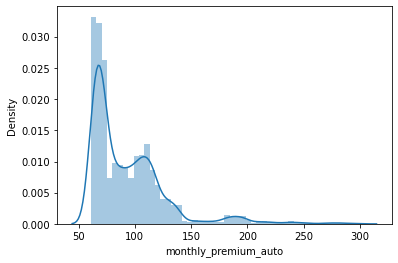

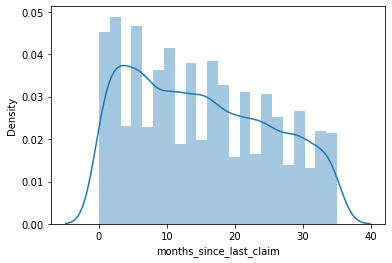

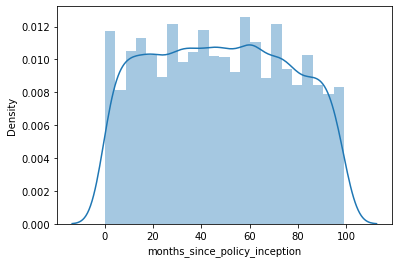

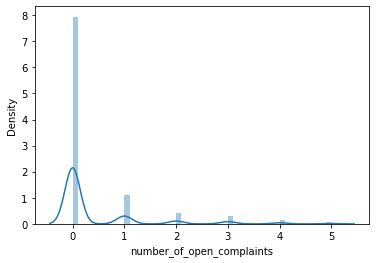

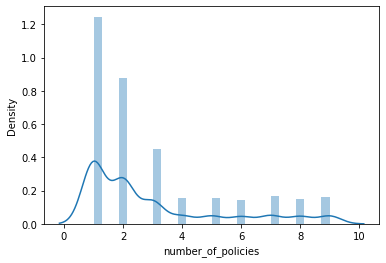

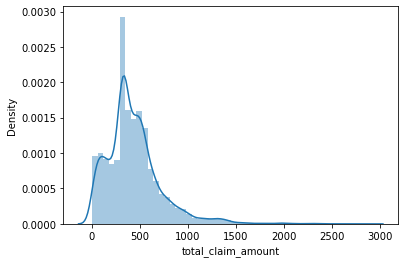

In [18]:
for i in data_num.columns:
    sns.distplot(data_num[i])
    plt.show()

In [29]:
# measures assymetry of my distribution [-2,2]
from scipy.stats import skew
data_num.apply(skew)

customer_lifetime_value          3.031782
income                           0.286840
monthly_premium_auto             2.123198
months_since_last_claim          0.278541
months_since_policy_inception    0.040158
number_of_open_complaints        2.782806
number_of_policies               1.253127
total_claim_amount               1.714684
dtype: float64

In [30]:
# measures spikenes of my distribution[-7,7]
from scipy.stats import kurtosis
kurtosis(data_num)

array([13.8153107 , -1.09438383,  6.18955826, -1.07373684, -1.13308258,
        7.7444103 ,  0.36230101,  5.97547158])

Q-Q plot for variable:  customer_lifetime_value


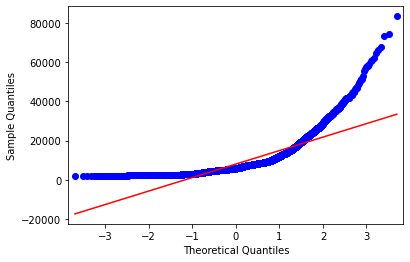

Q-Q plot for variable:  income


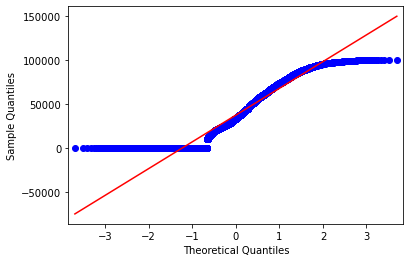

Q-Q plot for variable:  monthly_premium_auto


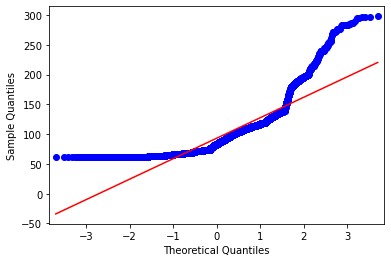

Q-Q plot for variable:  months_since_last_claim


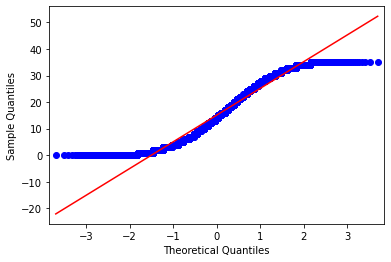

Q-Q plot for variable:  months_since_policy_inception


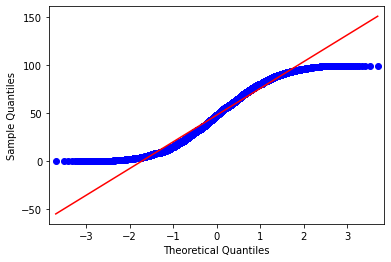

Q-Q plot for variable:  number_of_open_complaints


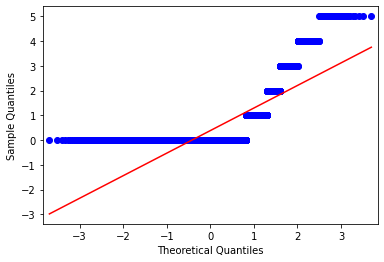

Q-Q plot for variable:  number_of_policies


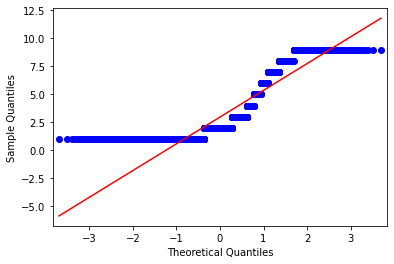

Q-Q plot for variable:  total_claim_amount


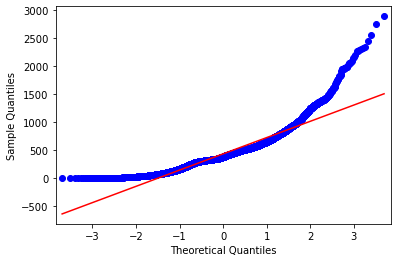

In [31]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

cols= list(data_num.columns)
for col in cols:
    print("Q-Q plot for variable: ",col)
    qqplot(data[col],line='s')
    pyplot.show()

In [20]:
data_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

<AxesSubplot:>

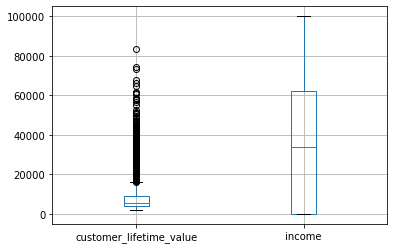

In [21]:
data_num.boxplot(['customer_lifetime_value','income'])

<AxesSubplot:>

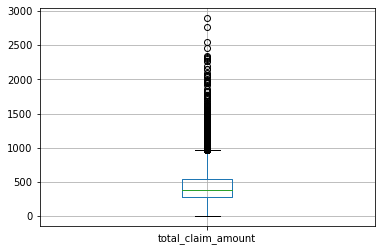

In [22]:
data_num.boxplot(['total_claim_amount'])

<AxesSubplot:>

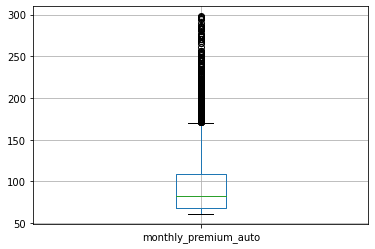

In [23]:
data_num.boxplot(['monthly_premium_auto'])

<AxesSubplot:>

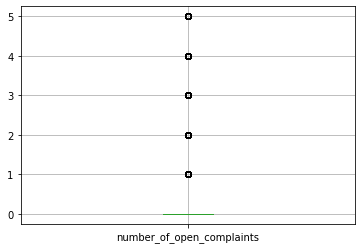

In [24]:
data_num.boxplot(['number_of_open_complaints'])

In [25]:
data_num.number_of_open_complaints.describe()

count    9134.000000
mean        0.384388
std         0.910384
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: number_of_open_complaints, dtype: float64

In [26]:
len(data_num[data_num.number_of_open_complaints > 0]),len(data_num)

(1882, 9134)

<AxesSubplot:>

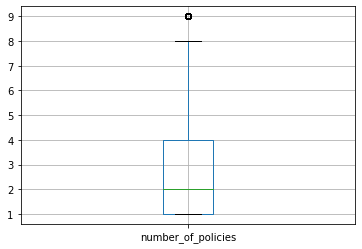

In [53]:
data_num.boxplot(['number_of_policies'])

In [33]:
data_num.number_of_policies.describe()

count    9134.000000
mean        2.966170
std         2.390182
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: number_of_policies, dtype: float64

In [35]:
len(data_num[data_num.number_of_policies > 8.0]),len(data_num)

(416, 9134)

<AxesSubplot:>

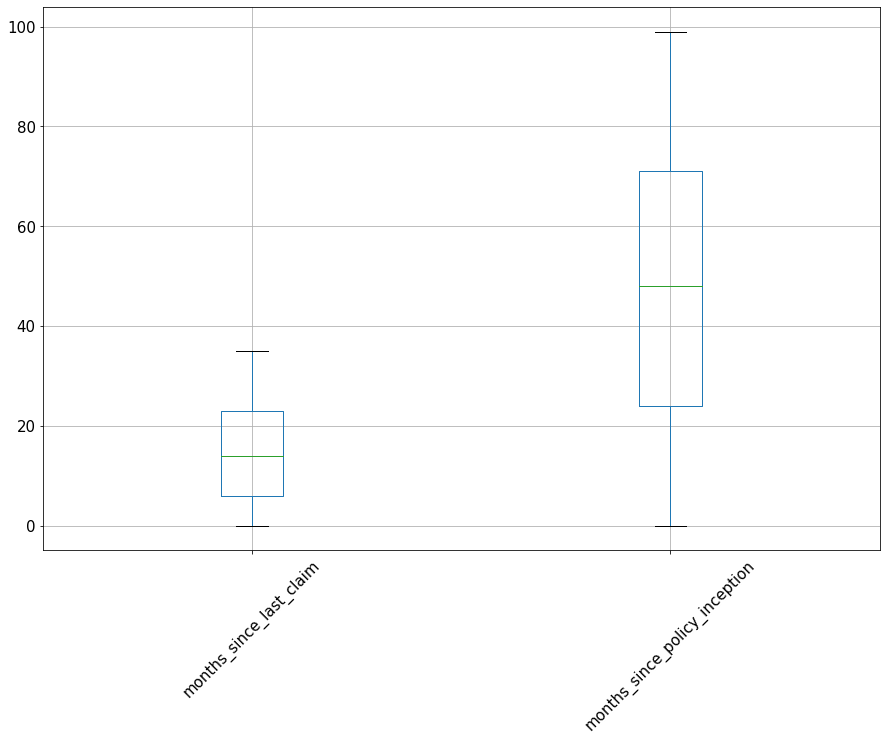

In [57]:
data_num.boxplot(['months_since_last_claim', 'months_since_policy_inception'],rot=45, fontsize=15, figsize=(15,10))

In [48]:
# Data Transformation for highly skewed distributions
## STANDARIZATION - customer_lifetime_value
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(data_num)
x_standardized = transformer.transform(data_num)
print(x_standardized.shape)

(9134, 8)


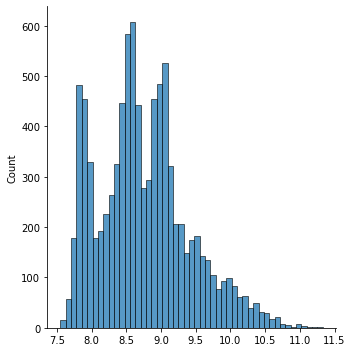

In [38]:
# Data Transformation for highly skewed distributions
## LOG TRANSFORMATION - customer_lifetime_value
var_log= list(map(np.log,data_num['customer_lifetime_value']))
sns.displot(var_log)
plt.show()

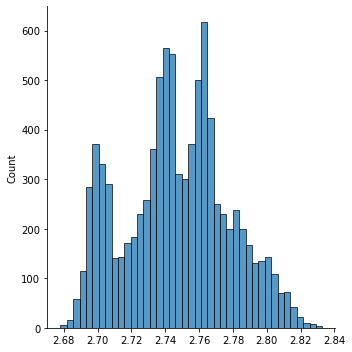

In [41]:
# Data Transformation for highly skewed distributions
## BOX-COX TRANSFORMATION - customer_lifetime_value
from scipy import stats
xt, lmbda = stats.boxcox(data_num['customer_lifetime_value'])
sns.displot(xt)
plt.show()

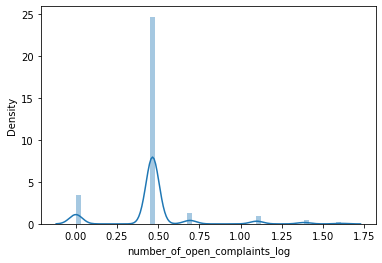

In [54]:
# Data Transformation for highly skewed distributions
## LOG TRANSFORMATION - number_of_open_complaints
def log_transfom_clean1(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0

def log_transfom_clean2(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

data_num['number_of_open_complaints_log'] = list(map(log_transfom_clean2, data_num['number_of_open_complaints']))
# Now we replace the NA by the mean
data_num['number_of_open_complaints_log'] = data_num['number_of_open_complaints_log'].fillna(np.mean(data_num['number_of_open_complaints_log']))

sns.distplot(data_num['number_of_open_complaints_log'])
plt.show()

### Split Data

In [18]:
Y = data['total_claim_amount']
data = data.drop(['total_claim_amount'], axis= 1)

##### split numerical data

In [19]:
X_train_num, X_test_num, y_train, y_test = train_test_split(data_num, Y, test_size=0.33, random_state=42)

In [20]:
y_train

290      537.600000
2236     655.489027
6380      17.558721
3396     741.300032
2118     404.074203
           ...     
5734     308.321335
5191     350.400000
5390    1059.572464
860      667.200000
7270     344.015386
Name: total_claim_amount, Length: 6119, dtype: float64

In [21]:
X_train_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
290,9027.867218,99002,112,33,75,1,8,537.600000
2236,4722.237214,0,65,29,32,0,3,655.489027
6380,17788.057050,73339,89,34,13,0,2,17.558721
3396,5112.306584,44743,137,16,55,4,1,741.300032
2118,4759.624343,26747,61,11,44,0,3,404.074203
...,...,...,...,...,...,...,...,...
5734,7334.328083,87957,61,31,63,0,2,308.321335
5191,5498.940679,22520,73,17,64,0,3,350.400000
5390,8992.779137,0,129,13,4,0,7,1059.572464
860,14635.451580,0,139,5,56,0,2,667.200000


In [22]:
#reset index
X_train_num = X_train_num.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
X_test_num = X_test_num.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [23]:
#Normalize data_num
transformer = Normalizer().fit(X_train_num) # rules for normalizer
X_train_num_normalized = transformer.transform(X_train_num)
X_test_num_normalized = transformer.transform(X_test_num)
X_train_num_df = pd.DataFrame(X_train_num_normalized)
X_test_num_df = pd.DataFrame(X_test_num_normalized)
print(X_train_num_df.shape)
print(X_test_num_normalized.shape)

(6119, 8)
(3015, 8)


In [24]:
X_train_num_df.head()

,0,1,2,3,4,5,6,7
0,0.090811,0.995853,0.001127,0.000332,0.000754,0.000010,0.000080,0.005408
1,0.990370,0.000000,0.013632,0.006082,0.006711,0.000000,0.000629,0.137472
2,0.235711,0.971822,0.001179,0.000451,0.000172,0.000000,0.000027,0.000233
3,0.113505,0.993396,0.003042,0.000355,0.001221,0.000089,0.000022,0.016459
4,0.175177,0.984421,0.002245,0.000405,0.001619,0.000000,0.000110,0.014872


In [25]:
y_train

0        537.600000
1        655.489027
2         17.558721
3        741.300032
4        404.074203
           ...     
6114     308.321335
6115     350.400000
6116    1059.572464
6117     667.200000
6118     344.015386
Name: total_claim_amount, Length: 6119, dtype: float64

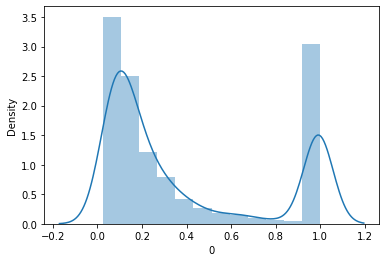

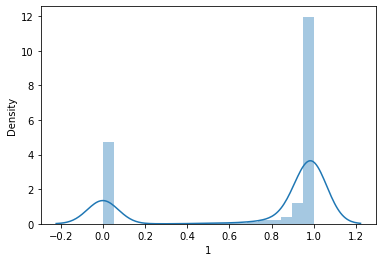

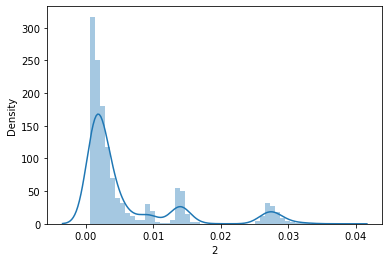

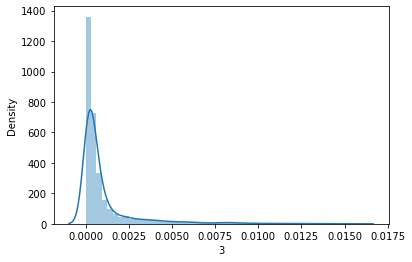

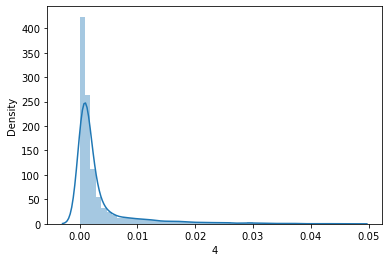

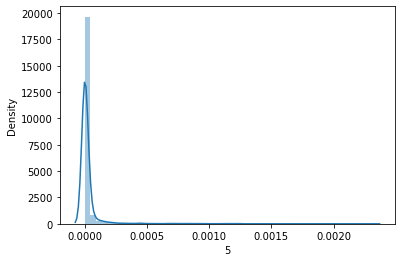

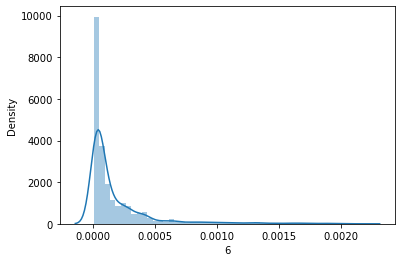

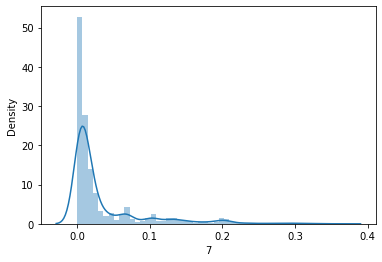

In [26]:
#plot normalized numerical data
for x in X_train_num_df.columns:
    sns.distplot(X_train_num_df[x])
    plt.show()

##### split ordinal data

In [27]:
X_train_ord, X_test_ord, y_train, y_test = train_test_split(data_ord, Y, test_size=0.33, random_state=42)

In [28]:
#To test if the rows are equal from X_ord to X_num
y_train

290      537.600000
2236     655.489027
6380      17.558721
3396     741.300032
2118     404.074203
           ...     
5734     308.321335
5191     350.400000
5390    1059.572464
860      667.200000
7270     344.015386
Name: total_claim_amount, Length: 6119, dtype: float64

In [29]:
X_train_ord.head()

,coverage,education,vehicle_size
290,Premium,Bachelor,Medsize
2236,Basic,High School or Below,Medsize
6380,Extended,Doctor,Medsize
3396,Extended,College,Small
2118,Basic,High School or Below,Medsize


In [30]:
#Encode ordinal data
enc = OrdinalEncoder()
enc.fit(data_ord)

data_ordinal = enc.transform(data_ord)
data_ordinal_df = pd.DataFrame(data_ordinal)
data_ordinal_df.columns = ['coverage','education','vehicle_size']
data_ordinal_df.head()

,coverage,education,vehicle_size
0,0.0,0.0,1.0
1,1.0,0.0,1.0
2,2.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [31]:
data_ordinal_df.describe()

,coverage,education,vehicle_size
count,9134.000000,9134.000000,9134.000000
mean,0.480622,1.554084,1.089556
std,0.655817,1.381978,0.537313
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000
max,2.000000,4.000000,2.000000


In [32]:
#split ordinal data again
X_train_ord_df, X_test_ord_df, y_train, y_test = train_test_split(data_ordinal_df, Y, test_size=0.33, random_state=42)

In [33]:
X_train_ord_df.head()

,coverage,education,vehicle_size
290,2.0,0.0,1.0
2236,0.0,3.0,1.0
6380,1.0,2.0,1.0
3396,1.0,1.0,2.0
2118,0.0,3.0,1.0


In [34]:
#reset indexes
X_train_ord_df = X_train_ord_df.reset_index(drop = True)
X_test_ord_df = X_test_ord_df.reset_index(drop = True)
X_test_ord_df.head()

,coverage,education,vehicle_size
0,0.0,3.0,1.0
1,0.0,3.0,1.0
2,1.0,1.0,2.0
3,1.0,1.0,1.0
4,0.0,3.0,1.0


##### Spit categorical data

In [35]:
#Transform categorical columns
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data_cat)

data_cat_df = pd.DataFrame(enc.transform(data_cat).toarray())
data_cat_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X_train_cat_df, X_test_cat_df, y_train, y_test = train_test_split(data_cat_df, Y, test_size=0.33, random_state=42)

In [46]:
#reset indexes
X_train_cat_df = X_train_cat_df.reset_index(drop = True)
X_test_cat_df = X_test_cat_df.reset_index(drop = True)
X_test_cat_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Concatenate DFs

In [47]:
final_data_train = pd.concat([X_train_cat_df, X_train_ord_df, X_train_num_df],axis=1)
final_data_test = pd.concat([X_test_cat_df, X_test_ord_df, X_test_num_df],axis=1)
final_data_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,coverage,education,vehicle_size,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.090811,0.995853,0.001127,0.000332,0.000754,0.000010,0.000080,0.005408
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.990370,0.000000,0.013632,0.006082,0.006711,0.000000,0.000629,0.137472
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.235711,0.971822,0.001179,0.000451,0.000172,0.000000,0.000027,0.000233
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.113505,0.993396,0.003042,0.000355,0.001221,0.000089,0.000022,0.016459
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.175177,0.984421,0.002245,0.000405,0.001619,0.000000,0.000110,0.014872


### Train the linear model

In [48]:
#Training the linear model
lm = linear_model.LinearRegression()
#"train" our linear model based on the data available on X_train and y_train
model = lm.fit(final_data_train,y_train)

### Predict the model

In [49]:
# We make predictions on X_test
predictions  = lm.predict(final_data_test)
predictions

array([222.78125, 383.625  , 454.8125 , ..., 233.03125, 758.03125,
       498.28125])

### Error Metrics

In [50]:
#Apply linear regression
print("The R2 of the linear model is: ",round(r2_score(y_test, predictions),2))

The R2 of the linear model is:  0.83


In [51]:
#Computing MSE
mse = mean_squared_error(y_test, predictions)
print(round(mse,2))

14079.89


In [52]:
#Computing RMSE
rmse = math.sqrt(mse)
print(round(rmse,2))

118.66


In [53]:
#Computing MAE
mae = mean_absolute_error(y_test, predictions)
print(round(mae,2))

77.83
